NAME OF STUDENTS TO COMPLETE PROJECT       

VENKAT VARDHAN

DHRUV KOTEGOANKAR

KUSAI HAJURI

SHWETA KAWADE

In [ ]:
# Exploration
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
# Model Implemenation
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing csv files

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/Walmart/train.csv.zip')
test = pd.read_csv(r'/content/drive/MyDrive/Walmart/test.csv.zip')
stores = pd.read_csv(r'/content/drive/MyDrive/Walmart/stores.csv')
features = pd.read_csv(r'/content/drive/MyDrive/Walmart/features.csv.zip')
sample_submission = pd.read_csv(r'/content/drive/MyDrive/Walmart/sampleSubmission.csv.zip')

# 1. Data Exploration

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Explore unique values in categorical variables
print("\nUnique Store Types:")
print(stores['Type'].unique())


Unique Store Types:
['A' 'B' 'C']


In [ ]:
print("\nUnique Departments:")
print(train['Dept'].unique())


Unique Departments:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [ ]:
print("\nUnique Holidays:")
print(train['IsHoliday'].unique())


Unique Holidays:
[False  True]


# 2. Feature Engineering

In [ ]:
# Combine store and department information
train['Store_Dept'] = train['Store'].astype(str) + '_' + train['Dept'].astype(str)
test['Store_Dept'] = test['Store'].astype(str) + '_' + test['Dept'].astype(str)

In [ ]:
# Extract month and year from the Date column
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Year'] = pd.to_datetime(train['Date']).dt.year

test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Year'] = pd.to_datetime(test['Date']).dt.year

features['Month'] = pd.to_datetime(features['Date']).dt.month
features['Year'] = pd.to_datetime(features['Date']).dt.year

In [ ]:
# Calculate the total markdown amount
features['Total_MarkDown'] = features['MarkDown1'] + features['MarkDown2'] + features['MarkDown3'] + features['MarkDown4'] + features['MarkDown5']

In [ ]:
# Encode categorical variables
# Example: One-hot encoding for store types
store_type_dummies = pd.get_dummies(stores['Type'], prefix='Store_Type', drop_first=True)
stores = pd.concat([stores, store_type_dummies], axis=1)

In [ ]:
# Merge additional features to the train and test datasets
train = train.merge(stores, on='Store', how='left')
train = train.merge(features, on=['Store', 'Date'], how='left')

test = test.merge(stores, on='Store', how='left')
test = test.merge(features, on=['Store', 'Date'], how='left')

In [ ]:
# Print the updated datasets
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Store_Dept,Month_x,Year_x,Type,Size,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month_y,Year_y,Total_MarkDown
0,1,1,2010-02-05,24924.50,False,1_1,2,2010,A,151315,...,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,2010,NaN
1,1,1,2010-02-12,46039.49,True,1_1,2,2010,A,151315,...,NaN,NaN,NaN,NaN,211.242170,8.106,True,2,2010,NaN
2,1,1,2010-02-19,41595.55,False,1_1,2,2010,A,151315,...,NaN,NaN,NaN,NaN,211.289143,8.106,False,2,2010,NaN
3,1,1,2010-02-26,19403.54,False,1_1,2,2010,A,151315,...,NaN,NaN,NaN,NaN,211.319643,8.106,False,2,2010,NaN
4,1,1,2010-03-05,21827.90,False,1_1,3,2010,A,151315,...,NaN,NaN,NaN,NaN,211.350143,8.106,False,3,2010,NaN


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday_x,Store_Dept,Month_x,Year_x,Type,Size,Store_Type_B,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month_y,Year_y,Total_MarkDown
0,1,1,2012-11-02,False,1_1,11,2012,A,151315,0,...,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,11,2012,18342.28
1,1,1,2012-11-09,False,1_1,11,2012,A,151315,0,...,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,11,2012,25633.44
2,1,1,2012-11-16,False,1_1,11,2012,A,151315,0,...,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,11,2012,17838.00
3,1,1,2012-11-23,True,1_1,11,2012,A,151315,0,...,4.17,74910.32,209.91,303.32,223.561947,6.573,True,11,2012,76311.31
4,1,1,2012-11-30,False,1_1,11,2012,A,151315,0,...,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,11,2012,NaN


In [ ]:
# Create lag features
train['Weekly_Sales_Lag1'] = train['Weekly_Sales'].shift(1)
train['Weekly_Sales_Lag2'] = train['Weekly_Sales'].shift(2)

In [ ]:
# Create rolling statistics
train['Rolling_Mean'] = train['Weekly_Sales'].rolling(window=4).mean()
train['Rolling_Std'] = train['Weekly_Sales'].rolling(window=4).std()

In [ ]:
# Convert 'Date' column to datetime type
train['Date'] = pd.to_datetime(train['Date'])

# Create seasonal features
train['Month'] = train['Date'].dt.month
train['Quarter'] = train['Date'].dt.quarter
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

In [ ]:
print(train.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x Store_Dept  Month_x  \
0      1     1 2010-02-05      24924.50        False        1_1        2   
1      1     1 2010-02-12      46039.49         True        1_1        2   
2      1     1 2010-02-19      41595.55        False        1_1        2   
3      1     1 2010-02-26      19403.54        False        1_1        2   
4      1     1 2010-03-05      21827.90        False        1_1        3   

   Year_x Type    Size  ...  Month_y  Year_y  Total_MarkDown  \
0    2010    A  151315  ...        2    2010             NaN   
1    2010    A  151315  ...        2    2010             NaN   
2    2010    A  151315  ...        2    2010             NaN   
3    2010    A  151315  ...        2    2010             NaN   
4    2010    A  151315  ...        3    2010             NaN   

   Weekly_Sales_Lag1  Weekly_Sales_Lag2  Rolling_Mean   Rolling_Std  Month  \
0                NaN                NaN           NaN           NaN      2   
1 

# 3. Data Pre-processing/Transformation

In [ ]:
# Convert the 'Date' column to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [ ]:
# Sort the datasets by 'Date'
train = train.sort_values('Date')
test = test.sort_values('Date')
features = features.sort_values('Date')

In [ ]:
# Set 'Date' as the index
train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)
features.set_index('Date', inplace=True)

In [ ]:
# Fill missing values
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
features.fillna(0, inplace=True)

In [ ]:
# Reset index
train.reset_index(inplace=True)
test.reset_index(inplace=True)
features.reset_index(inplace=True)

In [ ]:
features.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year,Total_MarkDown
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,0.0
1,2010-02-05,16,19.79,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,7.039,False,2,2010,0.0
2,2010-02-05,31,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010,0.0
3,2010-02-05,21,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010,0.0
4,2010-02-05,26,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False,2,2010,0.0


# 4. EDA

In [ ]:
print("stores.csv columns:")
print(stores.columns)

print("\ntrain.csv columns:")
print(train.columns)

print("\nfeatures.csv columns:")
print(features.columns)

stores.csv columns:
Index(['Store', 'Type', 'Size', 'Store_Type_B', 'Store_Type_C'], dtype='object')

train.csv columns:
Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Store_Dept',
       'Month_x', 'Year_x', 'Type', 'Size', 'Store_Type_B', 'Store_Type_C',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y',
       'Month_y', 'Year_y', 'Total_MarkDown', 'Weekly_Sales_Lag1',
       'Weekly_Sales_Lag2', 'Rolling_Mean', 'Rolling_Std', 'Month', 'Quarter',
       'WeekOfYear'],
      dtype='object')

features.csv columns:
Index(['Date', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Month', 'Year', 'Total_MarkDown'],
      dtype='object')


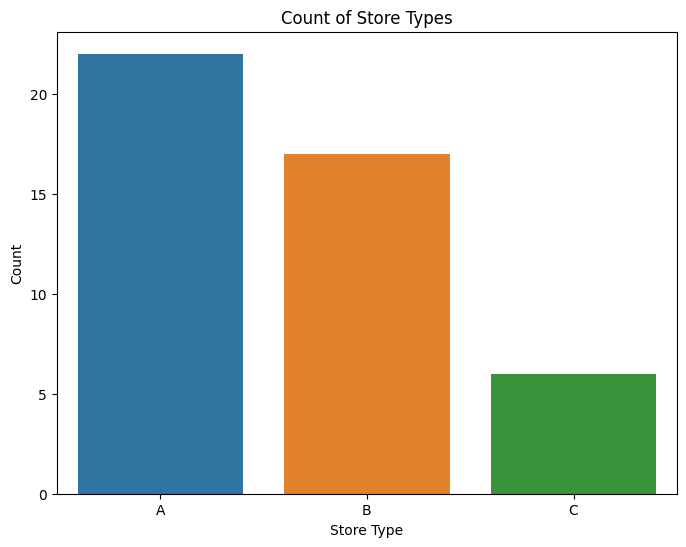

In [ ]:
# Countplot of store types
plt.figure(figsize=(8, 6))
sns.countplot(data=stores, x='Type')
plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

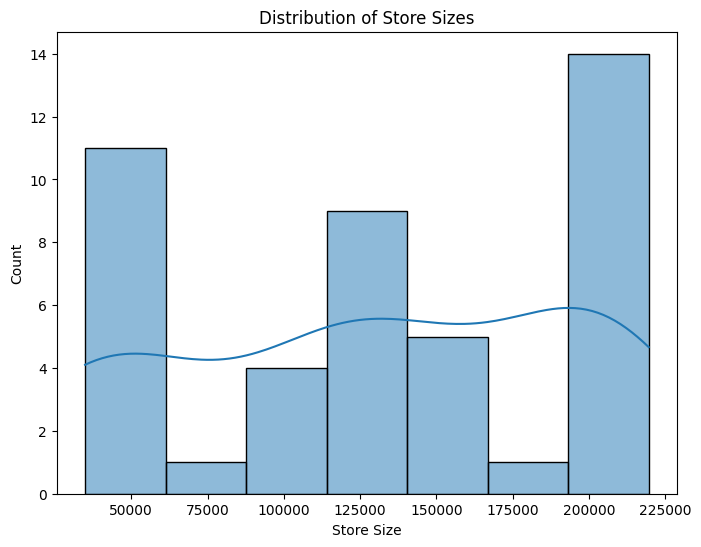

In [ ]:
# Distribution of store sizes
plt.figure(figsize=(8, 6))
sns.histplot(data=stores, x='Size', kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.show()

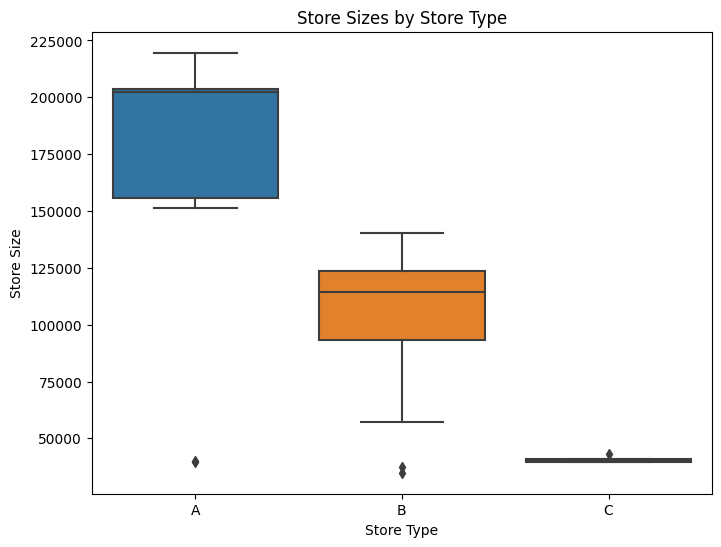

In [ ]:
# Boxplot of store sizes by store type
plt.figure(figsize=(8, 6))
sns.boxplot(data=stores, x='Type', y='Size')
plt.title('Store Sizes by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Store Size')
plt.show()

<ipython-input-37-72d4f45982ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stores.corr()


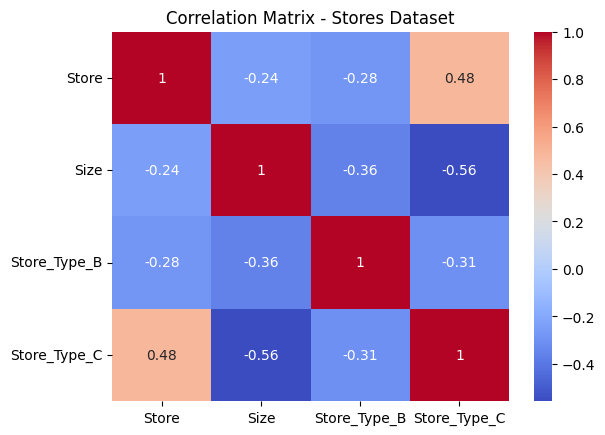

In [ ]:
# Correlation matrix
correlation_matrix = stores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Stores Dataset')
plt.show()

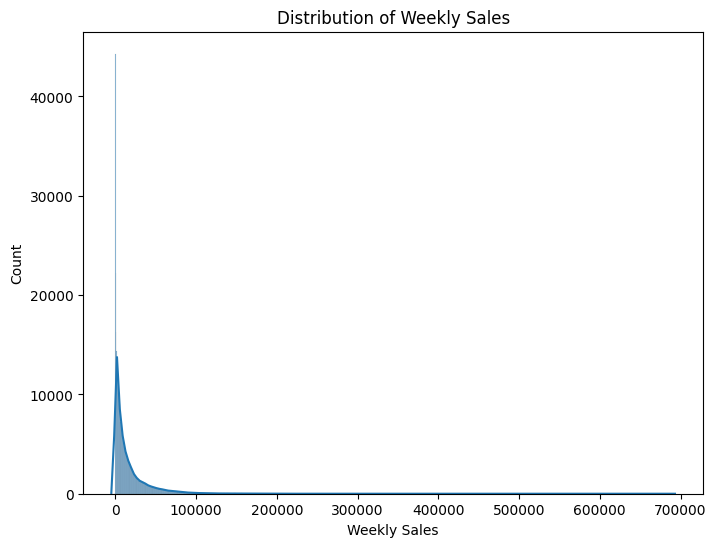

In [ ]:
# Distribution of weekly sales
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='Weekly_Sales', kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.show()

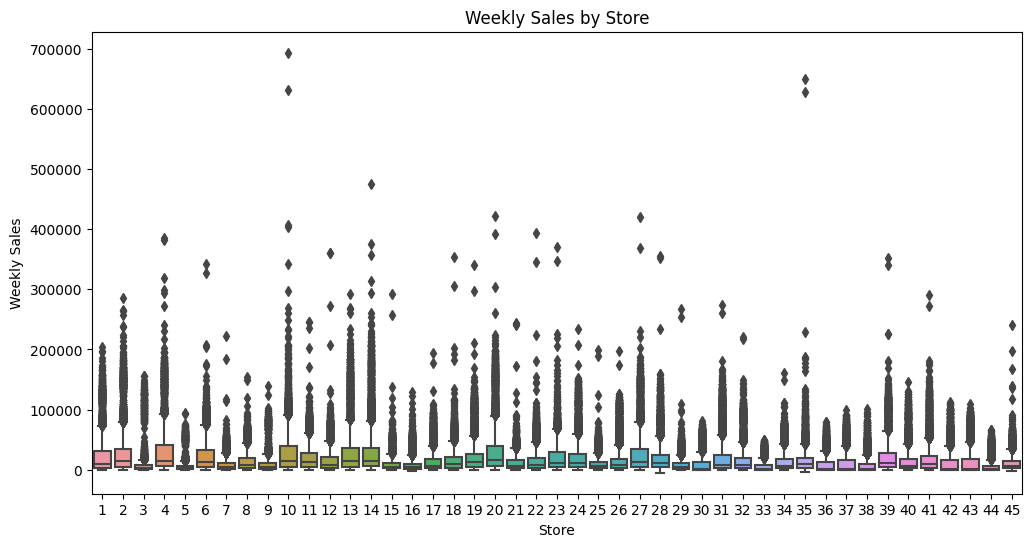

In [ ]:
# Boxplot of weekly sales by store
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

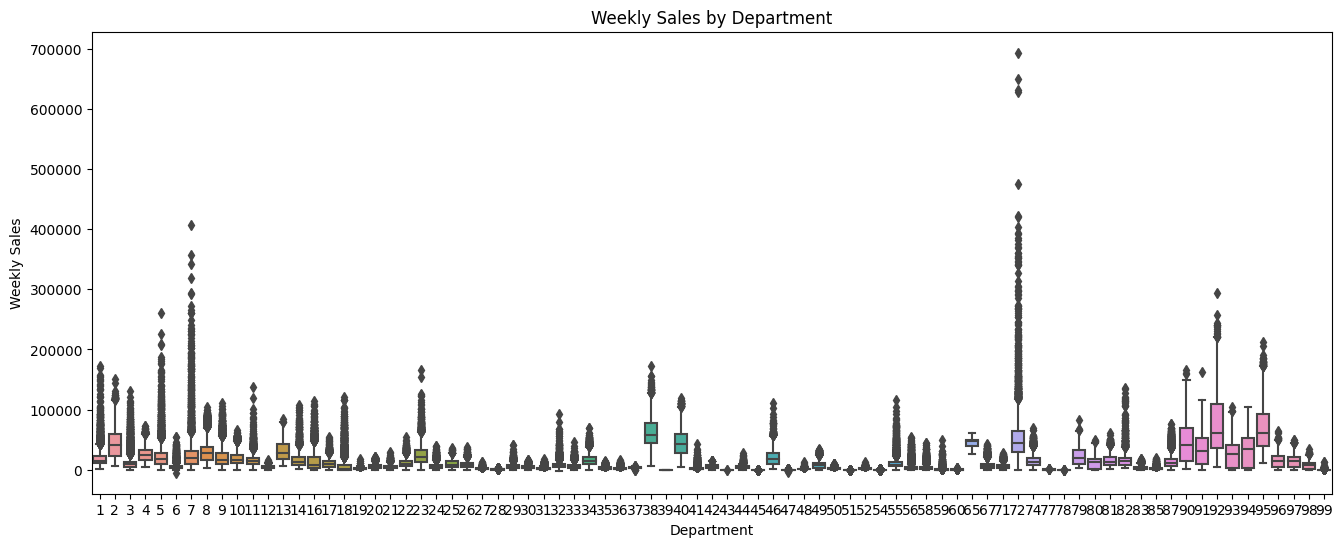

In [ ]:
# Boxplot of weekly sales by department
plt.figure(figsize=(16, 6))
sns.boxplot(data=train, x='Dept', y='Weekly_Sales')
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

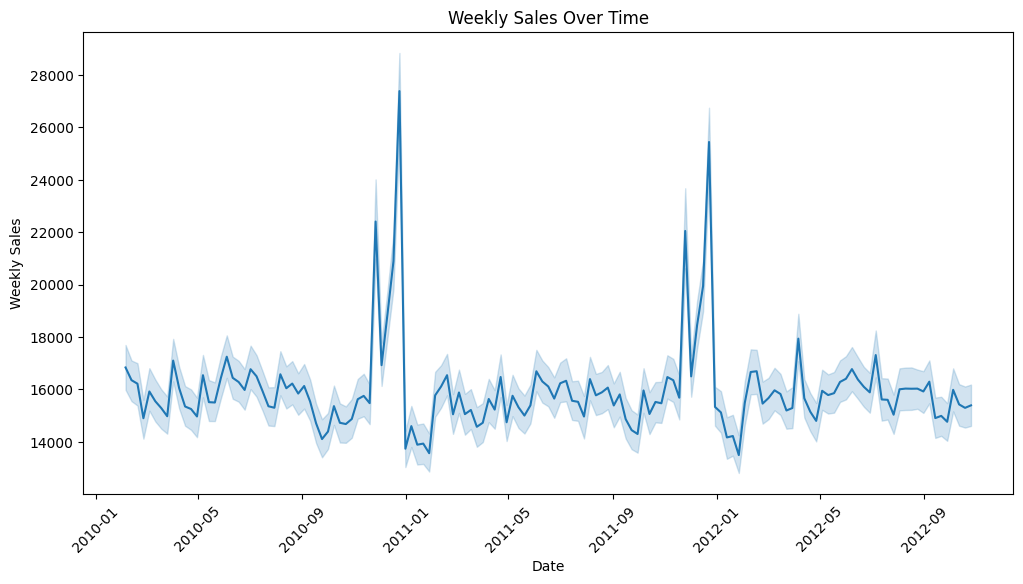

In [ ]:
# Line plot of weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

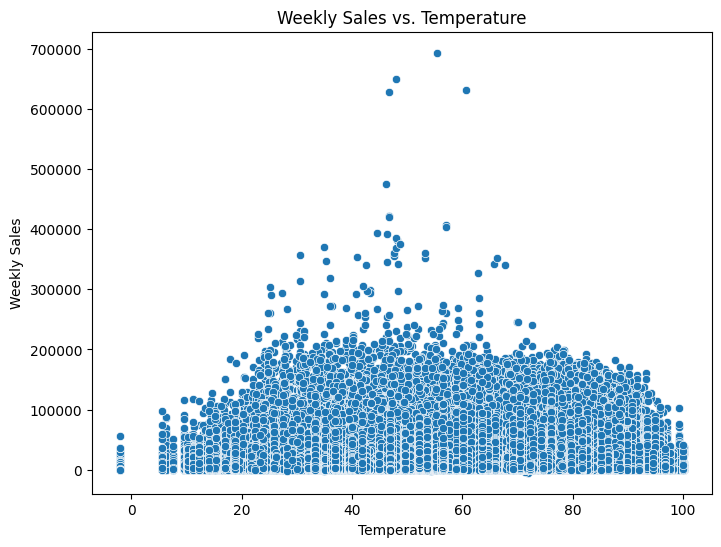

In [ ]:
# Scatter plot of weekly sales vs. temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = train.corr()

fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis'))

fig.update_layout(
    title='Correlation Matrix - Train Dataset',
    xaxis_title='Features',
    yaxis_title='Features')

# Increase the figure size
fig.update_layout(height=800, width=800)

# Display the interactive plot
pio.show(fig)

<ipython-input-43-d29efcd8e247>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


Features

In [ ]:
# Plotting the distribution of numerical features
numerical_cols = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
fig, ax = plt.subplots(figsize=(15, 10))

for col in numerical_cols:
    sns.histplot(data=features, x=col, kde=True, ax=ax)
    ax.set_title("Distribution of Numerical Features")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Count")

# Plotting the distribution of numerical features using Plotly
fig = px.histogram(features, x=numerical_cols, marginal="rug", nbins=30)
fig.update_layout(height=600, width=900, title="Distribution of Numerical Features")
fig.show()

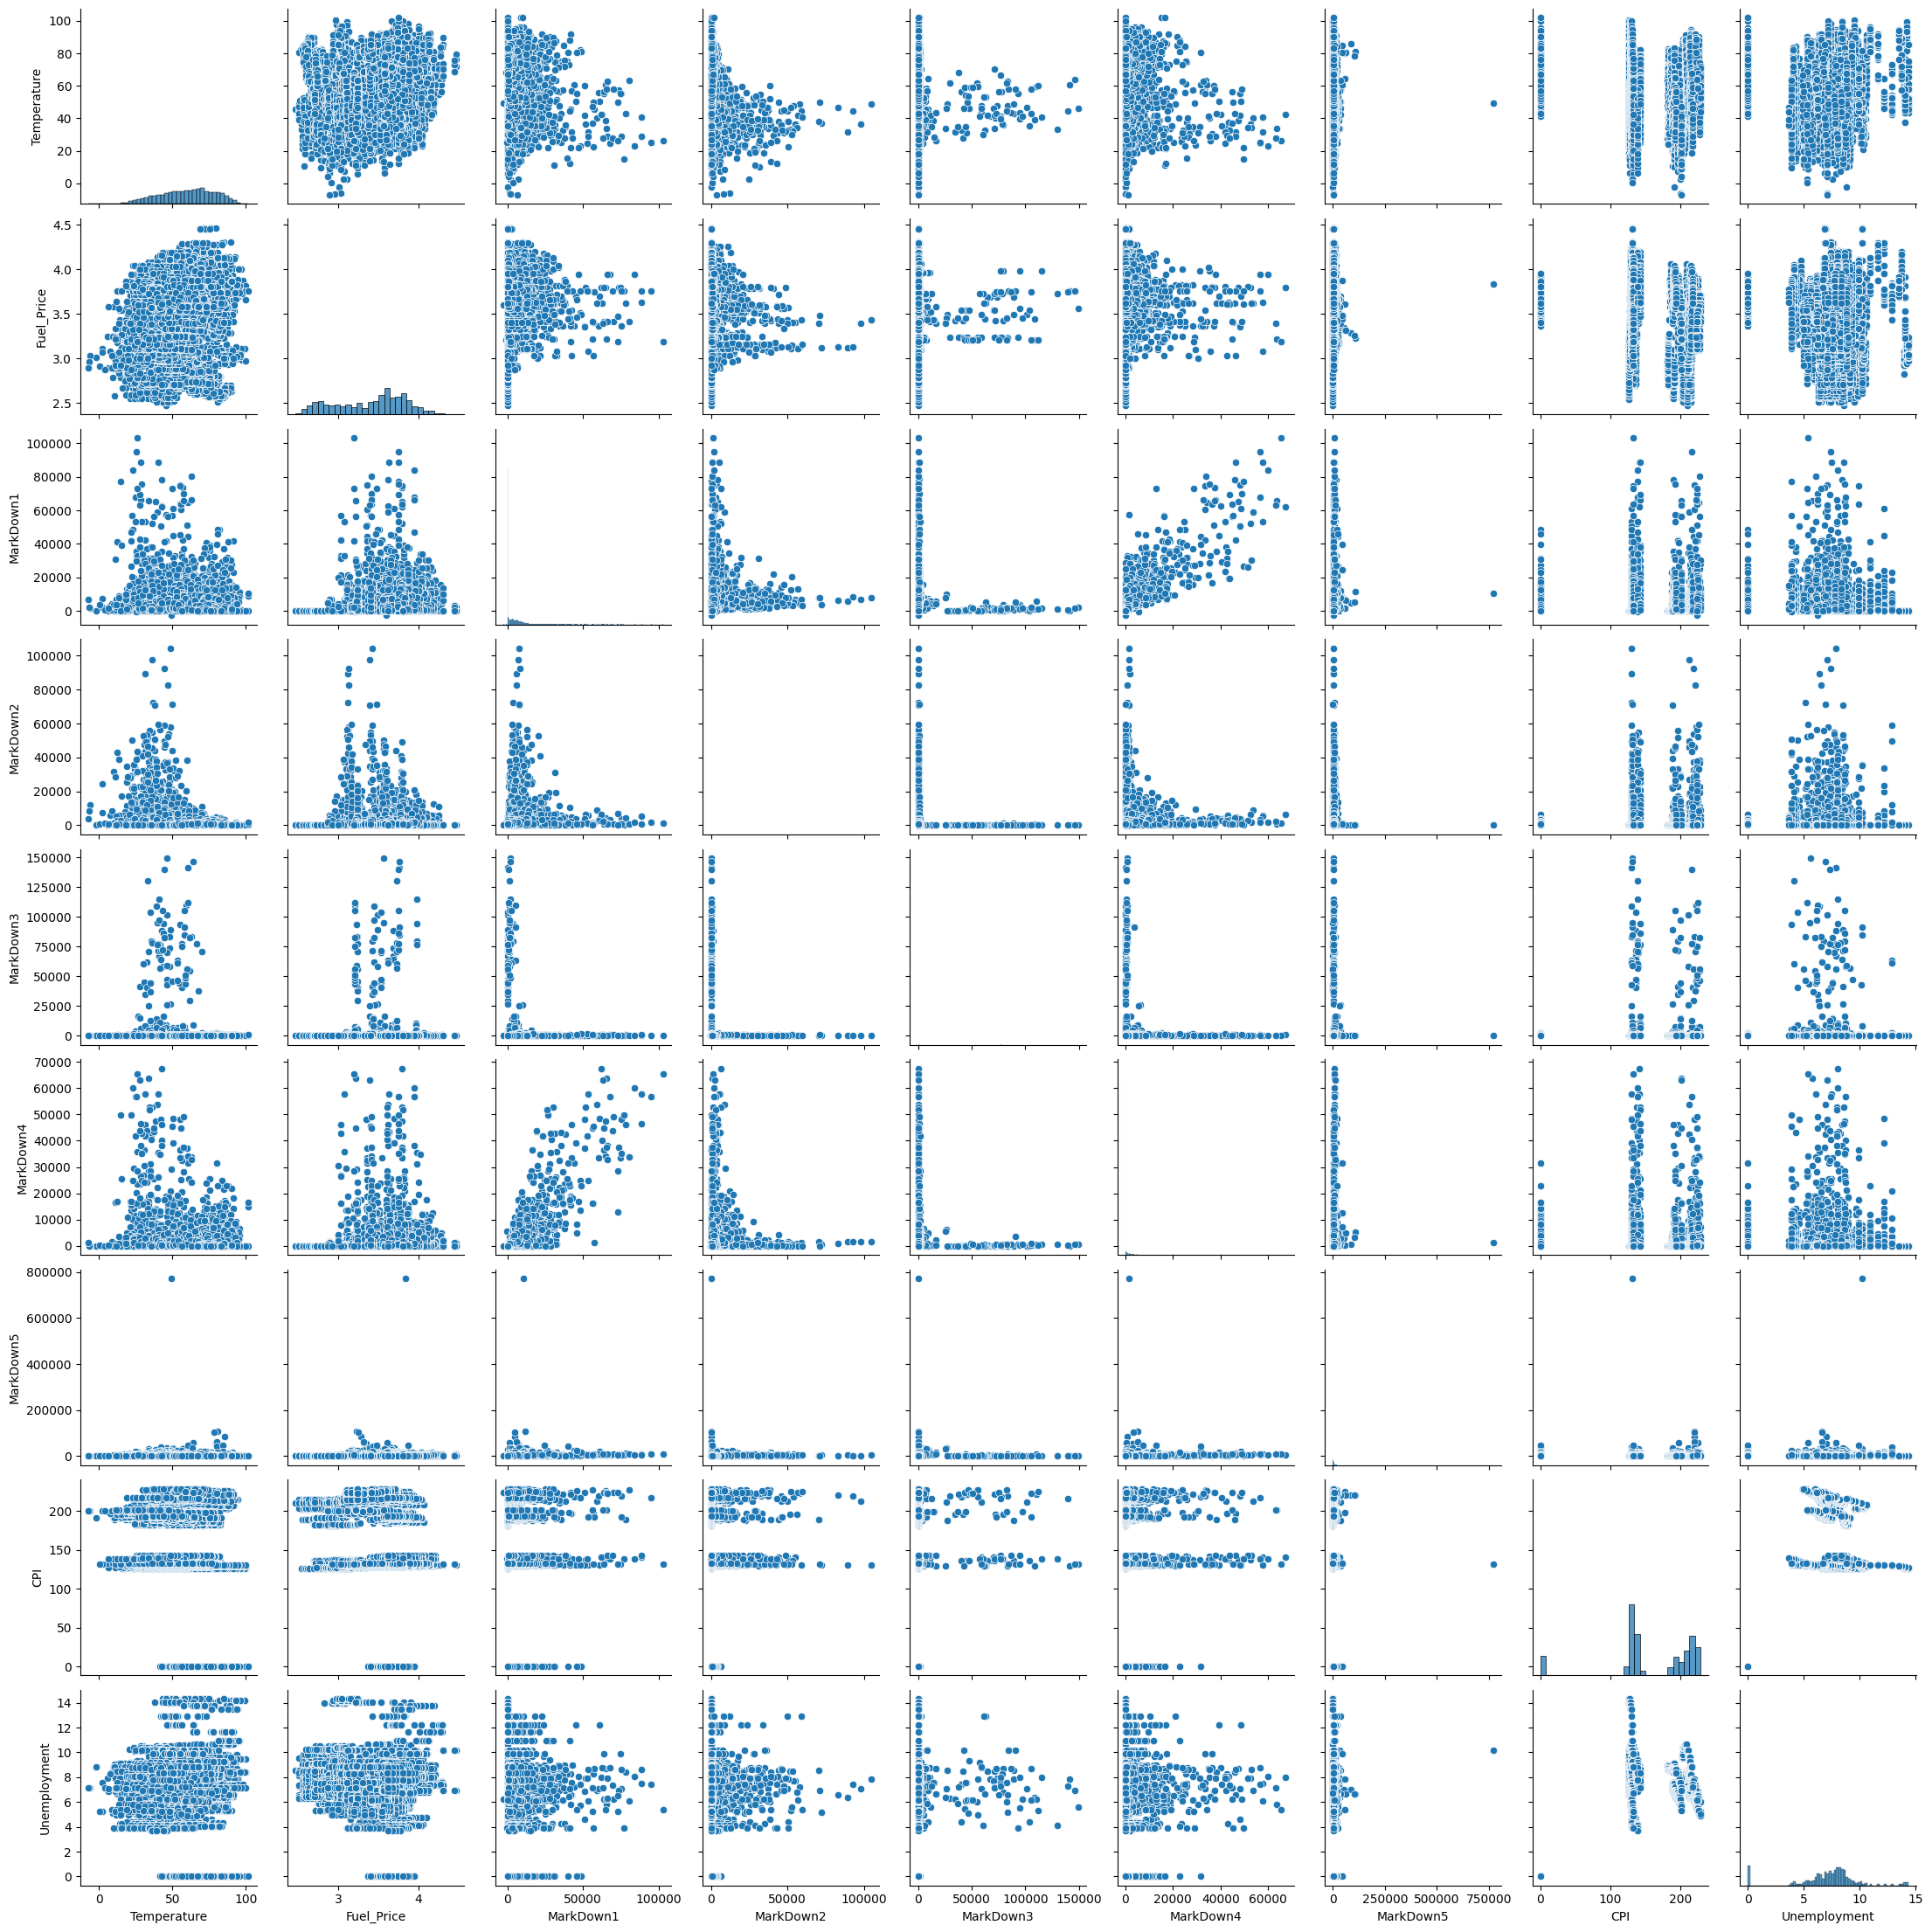

In [ ]:
# Plotting the relationship between features
sns.pairplot(features[numerical_cols])
plt.show()

# 5. Sales Forecasting

In [ ]:
# Specify the store and department for forecasting
store = 2
department = 1

In [ ]:
# Filter the sales data for the specified store and department
sales_data = train[(train['Store'] == store) & (train['Dept'] == department)]['Weekly_Sales']

In [ ]:
# Fit ARIMA model to the sales data
model = ARIMA(sales_data, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Forecast future sales
forecast_steps = 12  # Specify the number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# Print the forecasted sales
print(f"Forecasted sales for Store {store} and Department {department}:")
print(forecast)

Forecasted sales for Store 2 and Department 1:
143    36323.137716
144    33532.319497
145    32060.566702
146    31284.430056
147    30875.130278
148    30659.283869
149    30545.456119
150    30485.428452
151    30453.772543
152    30437.078631
153    30428.275008
154    30423.632371
Name: predicted_mean, dtype: float64


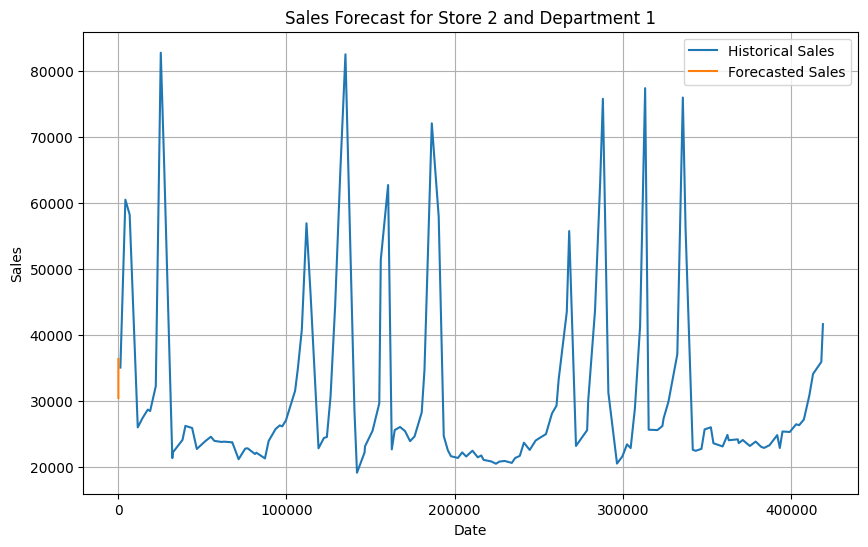

In [ ]:
# Plot the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data.values, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales')
plt.title(f"Sales Forecast for Store {store} and Department {department}")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Specify the store and department for analysis
store = 2
department = 1

# Filter the sales data for the specified store and department
sales_data = train[(train['Store'] == store) & (train['Dept'] == department)][['Date', 'Weekly_Sales']]

# Set the Date column as the index
sales_data.set_index('Date', inplace=True)

# Perform time series decomposition
result = seasonal_decompose(sales_data['Weekly_Sales'], model='additive')

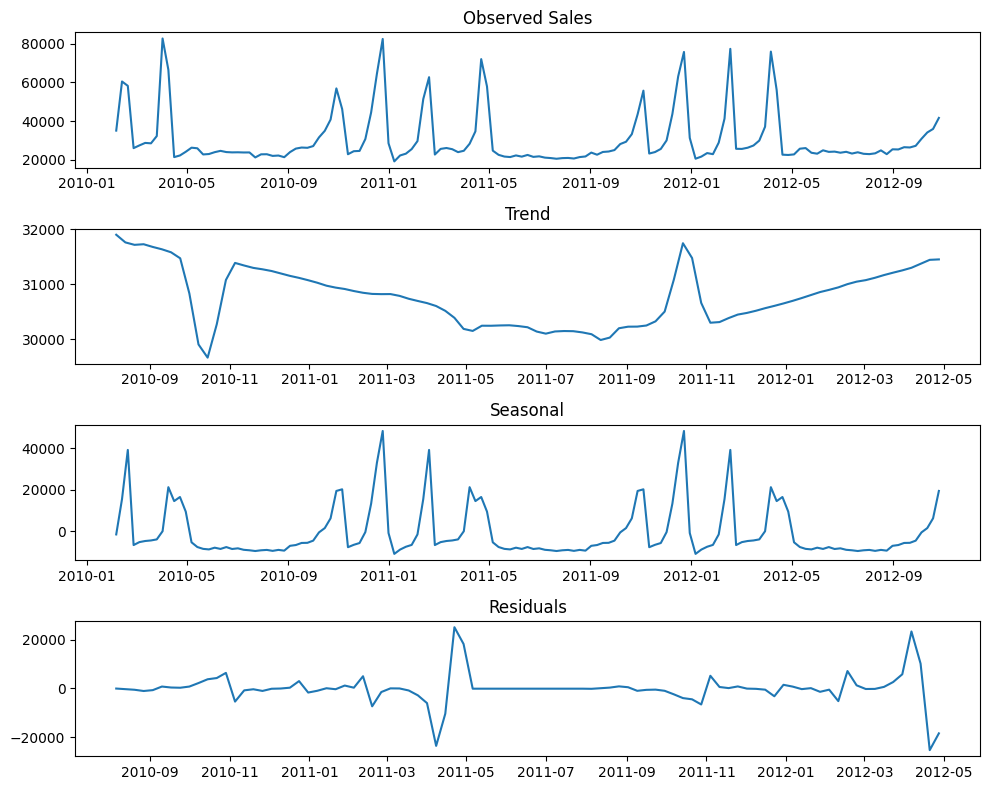

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed Sales')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

# Conclusion

Now we have a forecast model that can predict the sales of the coming weeks. With real-world data, the predictions will almost never be 100% in sync with the data, but we can see that the predictions stay in a reasonable range for off-holiday season sales. We can use the forecast information to optimize staffing and other resources.